In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'config'

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [13]:
# Perform API call
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get latitude and temperature for cities

# set up lists to hold reponse info
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(city)
    try:
        city_response = requests.get(query_url + city).json()
    except Exception as e:
        print(e)
    try:
        lat.append(city_response['coord']['lat'])
    except Exception as e: 
        print(e)
        lat.append('NaN')
    try:
        lng.append(city_response['coord']['lon'])
    except Exception as e: 
        print(e)
        lng.append('NaN')
    try:
        temp.append(city_response['main']['temp'])
    except Exception as e:
        print(e)
        temp.append('NaN')
    try:
        max_temp.append(city_response['main']['temp_max'])
    except Exception as e:
        print(e)
        max_temp.append('NaN')
    try:
        humidity.append(city_response['main']['humidity'])
    except Exception as e:
        print(e)
        humidity.append('NaN')
    try:
        cloudiness.append(city_response['clouds']['all'])
    except Exception as e:
        print(e)
        cloudiness.append('NaN')
    try:
        windspeed.append(city_response['wind']['speed'])
    except Exception as e:
        print(e)
        windspeed.append('NaN')
    time.sleep(1)
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

saleaula
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
pevek
abha
sulya
cape town
atuona
chokurdakh
quelimane
poum
ushuaia
vaini
kavaratti
busselton
albany
temaraia
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
burnie
sorland
mbaiki
termiz
kapaa
kumba
puerto ayora
tuktoyaktuk
nome
codrington
vostok
victoria
olafsvik
punta arenas
amderma
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
bredasdorp
miraflores
sweetwater
lata
jamestown
upernavik
otorohanga
aviles
belushya guba
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
kudahuvadhoo
jabiru
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
coihaique
rikitea
bambous virieux
cockburn town
camacha
bonavista
ostrovnoy
yulara
halifax
ozinki
georgetown
avarua
new norfolk
mataura
sakakah
khatanga
mindelo
tsihombe
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
glendive
tasiilaq
henties bay
taolanaro
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
perelyub
zhanatas
'coord'
'coord'
'main'
'main'
'main'
'clouds

kopervik
ascension
awjilah
trelew
havre-saint-pierre
yellandu
guerrero negro
pochutla


In [17]:
# Convert raw data to data frame

data_dict = {'City': cities,
             'Latitude': lat,
             'Longitude': lng,
             'Temperature': temp,
             'Maximum Temperature': max_temp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             'Windspeed': windspeed}

cities_df = pd.DataFrame(data_dict)
cities_df = cities_df.replace('NaN', np.NaN)
cities_df = cities_df.dropna()

# Saving for VacationPy
cities_df.to_csv('cities.csv', index=False)

cities_df.head()

,City,Latitude,Longitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Windspeed
1,pevek,69.70,170.31,8.98,8.98,89.0,99.0,5.59
2,abha,18.22,42.51,56.26,57.20,82.0,37.0,0.18
3,sulya,12.57,75.38,78.80,78.80,88.0,20.0,1.97
4,cape town,-33.93,18.42,64.20,68.00,88.0,95.0,10.29
5,atuona,-9.80,-139.03,83.34,83.34,61.0,0.0,4.76


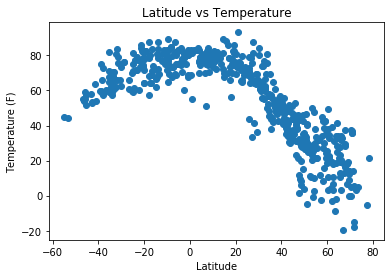

In [18]:
# Latitude vs. Temperature Plot

plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

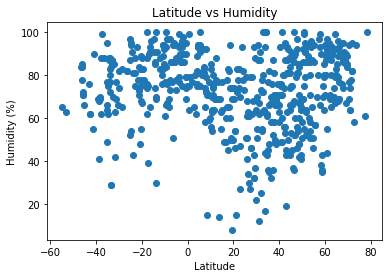

In [19]:
# Latitude vs. Humidity Plot
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

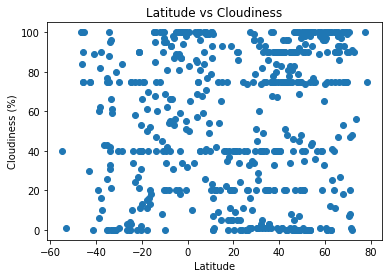

In [20]:
# Latitude vs. Cloudiness Plot
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

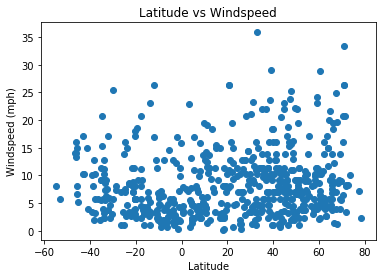

In [21]:
# Latitude vs. Wind Speed Plot
plt.scatter(cities_df['Latitude'], cities_df['Windspeed'])
plt.title('Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
 
def regressplot(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f'{title}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    # Print r square value
    print(f"The r is: {rvalue}")
    return


The r is: 0.10335653832458522


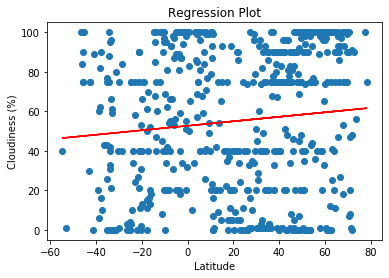

In [23]:
regressplot(cities_df['Latitude'], cities_df['Cloudiness'], 'Regression Plot', 'Latitude', 'Cloudiness (%)')

In [3]:
# Create Northern and Southern Hemisphere DataFrames

cities_north = cities_df.loc[cities_df['Latitude'] > 0]
cities_south = cities_df.loc[cities_df['Latitude'] < 0]


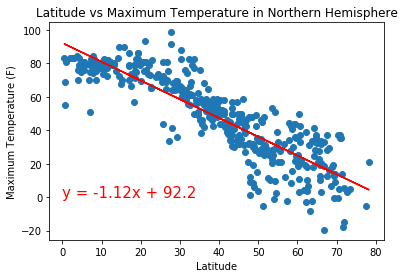

The r is: -0.8736687524155562


In [55]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Maximum Temperature'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Maximum Temperature'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Maximum Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


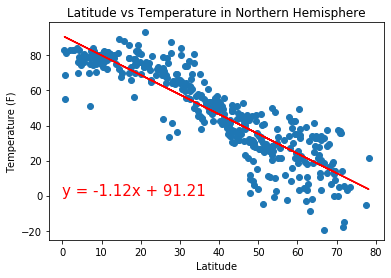

The r is: -0.8846160158408379


In [57]:
# Northern Hemisphere - Temp vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Temperature'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Temperature'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


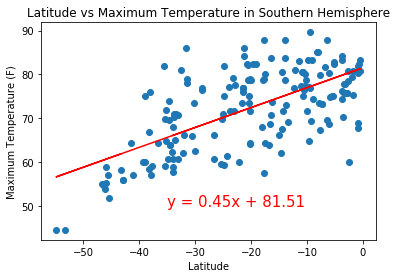

The r is: 0.6525237518953227


In [58]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Maximum Temperature'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Maximum Temperature'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Maximum Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


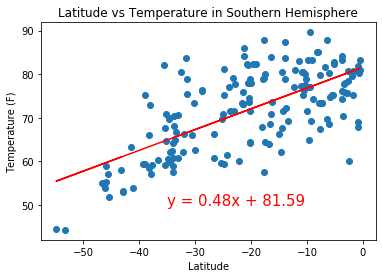

The r is: 0.6779860241050022


In [59]:
# Southern Hemisphere - Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Temperature'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Temperature'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


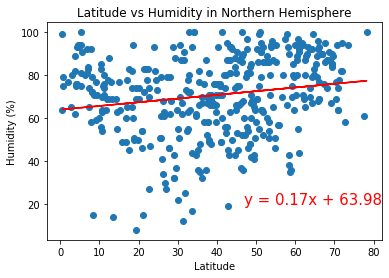

The r is: 0.18104068424039202


In [61]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Humidity'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Humidity'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Humidity in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(47,20),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


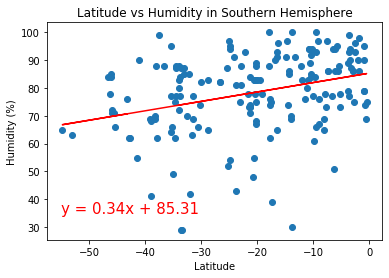

The r is: 0.3179780068004265


In [65]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Humidity'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Humidity'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


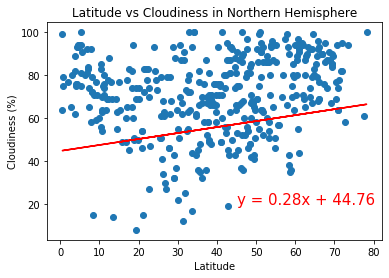

The r is: 0.1467063733255111


In [68]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Cloudiness'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Humidity'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


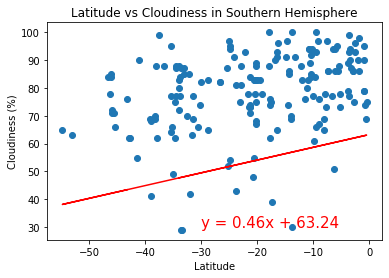

The r is: 0.18096692748957618


In [70]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Cloudiness'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Humidity'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


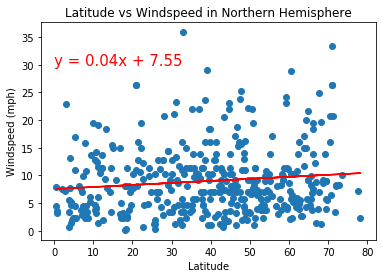

The r is: 0.1168980039951421


In [71]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Windspeed'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Windspeed'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Windspeed in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")


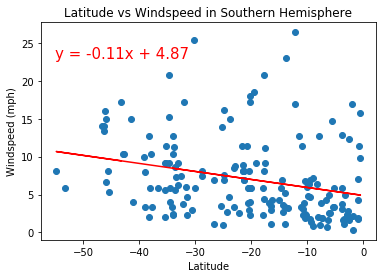

The r is: -0.27221026414150146


In [4]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Windspeed'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Windspeed'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Windspeed in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")
